In [2]:
import data_management
import nn
import data_tools as tools

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import seaborn as sns

In [3]:
attr = ['child_mortality', 'population', 'children_per_mother', 'income_per_person', 'life_expectancy']
df = data_management.get_global_data(attr)

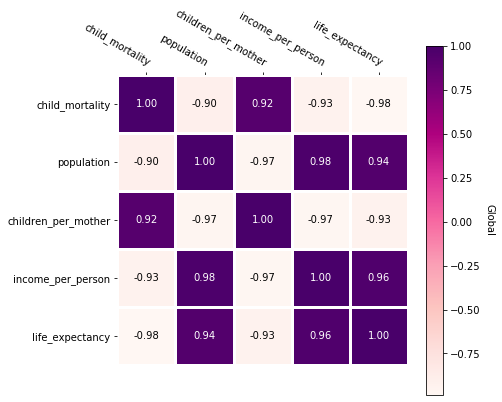

In [3]:
tools.plot_heatmap(df, (7, 6))

In [4]:
data_norm, data_cache = tools.normalize(df)
tools.show_content(data_norm)

test_X = data_norm.loc[:, data_norm.columns != 'life_expectancy']
test_Y = data_norm.loc[:, data_norm.columns == 'life_expectancy'] 

Dataset has (219, 5) entries.
Data starts from: 1800, until 2018

	Column               | Type     | Min          | Max         

	child_mortality      | float64  |         -1.8 |          1.0
	population           | float64  |         -0.8 |          2.6
	children_per_mother  | float64  |         -2.4 |          0.8
	income_per_person    | float64  |         -0.8 |          3.2
	life_expectancy      | float64  |         -1.3 |          2.1



In [5]:
mean = np.sum(test_Y['life_expectancy']) / len(test_Y['life_expectancy'])
mask = test_Y.mask(test_Y > mean, 1) .mask(test_Y <= mean, 0)

In [6]:
nn.check_grads([4,3,3,3,3,3,2,1], test_X, test_Y)

Good gradients


#Correlation with output variable
cor_target = abs(cor["life_expectancy"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features